In [1]:
# This notebook illustrates the wave-like decoding progression in AMP decoded
# spatially coupled SPARCs. 
#
# Can use this notebook to reproduce Fig. 3 of 
# "Capacity-Achieving Spatially Coupled Sparse Superposition Codes With AMP Decoding" 
# by Rush, Hsieh and Venkataramanan, 2021.
#
# Copyright (c) 2021 Kuan Hsieh

import numpy as np 
from sparc_sim import sparc_sim
from sparc_se import sparc_se
import matplotlib.pyplot as plt
import time

In [2]:
# Spatially coupled SPARCs with AMP decoding simulations
awgn_var      = 1.0                 # AWGN channel noise variance
code_params   = {'spatially_coupled': True,
                 'P': 15.0,         # Average codeword symbol power constraint
                 'R': 1.5,          # Rate
                 'L': 2048,         # Number of sections
                 'M': 512,          # Columns per section
                 'omega': 6,        # Coupling width
                 'Lambda': 32}      # Coupling length
decode_params = {'t_max': 40}       # Maximum number of iterations
num_of_runs   = 10                  # Number of encoding/decoding trials
rng = np.random.RandomState(seed=None) 

nmse_store  = np.zeros((num_of_runs, decode_params['t_max'], code_params['Lambda']))
for i in range(num_of_runs):
    start_time    = time.perf_counter()
    rng_seed      = rng.randint(2**32-1, size=2).tolist()
    results       = sparc_sim(code_params, decode_params, awgn_var, rng_seed) 
    nmse_store[i] = results['nmse']
    print('Run #{}, SER: {:1.4f}, number of iterations: {:3d}, time elapsed: {:2.3f}'
          .format(i, results['ser'], results['t_final'], time.perf_counter()-start_time))
print('Code parameters:', code_params)

Run #0, SER: 0.0000, number of iterations:  33, time elapsed: 18.780
Run #1, SER: 0.0000, number of iterations:  34, time elapsed: 18.316
Run #2, SER: 0.0000, number of iterations:  34, time elapsed: 17.384
Run #3, SER: 0.0000, number of iterations:  36, time elapsed: 20.828
Run #4, SER: 0.0000, number of iterations:  35, time elapsed: 20.515
Run #5, SER: 0.0000, number of iterations:  35, time elapsed: 22.818
Run #6, SER: 0.0000, number of iterations:  33, time elapsed: 21.056
Run #7, SER: 0.0000, number of iterations:  34, time elapsed: 21.755
Run #8, SER: 0.0000, number of iterations:  34, time elapsed: 24.845
Run #9, SER: 0.0000, number of iterations:  35, time elapsed: 18.494
Code parameters: {'complex': False, 'modulated': False, 'power_allocated': False, 'spatially_coupled': True, 'P': 15.0, 'R': 1.5, 'L': 2048, 'M': 512, 'omega': 6, 'Lambda': 32, 'n': 12284, 'R_actual': 1.5004884402474763}


In [7]:
# State evolution
mc_samples = 10000
nmse_se,_ = sparc_se(awgn_var, code_params, decode_params['t_max'], mc_samples)

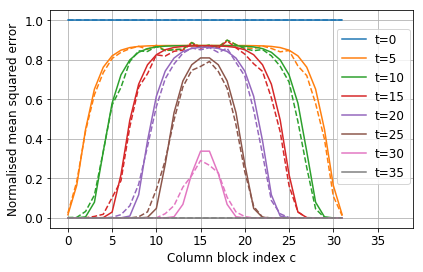

In [8]:
T          = decode_params['t_max']
prop_cycle = plt.rcParams['axes.prop_cycle']
colors     = prop_cycle.by_key()['color']

plt.figure(figsize=(6.5,4))
for i, t in enumerate(np.arange(0,T,5)):
    plt.plot(nmse_se[t], '-', color=colors[i], label='t='+str(t))
    plt.plot(nmse_store[:,t].mean(axis=0), '--', color=colors[i])
plt.xlim([-2, 39])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Column block index c', fontsize=12)
plt.ylabel('Normalised mean squared error', fontsize=12)
plt.grid(True)
plt.legend(loc=(0.79,0.2), fontsize=12)